# Read Dataset

In [1]:
import pandas as pd

df = pd.read_csv('data/color_names_all.csv')
df

,name,red,green,blue
0,Absolute zero,0,72,186
1,Acid green,176,191,26
2,Aero,124,185,232
3,Aero blue,201,255,229
4,African violet,178,132,190
...,...,...,...,...
4167,Zircon,244,248,255
4168,Zombie,228,214,155
4169,Zorba,165,155,145
4170,Zuccini,4,64,34


In [4]:
names = df['name']

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4172 entries, 0 to 4171
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    4172 non-null   object
 1   red     4172 non-null   int64 
 2   green   4172 non-null   int64 
 3   blue    4172 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 130.5+ KB


# Preprocessing Data
## Tokenization

In [5]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import preprocessing


maxlen = 30
t = Tokenizer(char_level=True)
t.fit_on_texts(names)
tokenized = t.texts_to_sequences(names)
padded_names = preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)

In [6]:
padded_names.shape

(4172, 30)

## One-hot encoding

In [7]:
from keras.utils import to_categorical
one_hot_names = to_categorical(padded_names)


In [8]:
one_hot_names.shape

(4172, 30, 48)

## Normalization

In [9]:
import numpy as np
# The RGB values are between 0 - 255
# scale them to be between 0 - 1
def norm(value):
    return value / 255.0

normalized_values = np.column_stack([norm(df["red"]), norm(df["green"]), norm(df["blue"])])

In [10]:
normalized_values.shape

(4172, 3)

# Create model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Reshape

model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(maxlen, 48)))
model.add(LSTM(128))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse', metrics=['acc'])

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 256)        │       312,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 526,339 (2.01 MB)

 Trainable params: 526,339 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

## Fit Model

In [13]:
history = model.fit(one_hot_names, normalized_values,
                    epochs=40,
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - acc: 0.5576 - loss: 0.0915 - val_acc: 0.6005 - val_loss: 0.0909
Epoch 2/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - acc: 0.6810 - loss: 0.0745 - val_acc: 0.6292 - val_loss: 0.0859
Epoch 3/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - acc: 0.7117 - loss: 0.0702 - val_acc: 0.6292 - val_loss: 0.0862
Epoch 4/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - acc: 0.7317 - loss: 0.0664 - val_acc: 0.6196 - val_loss: 0.0875
Epoch 5/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - acc: 0.7335 - loss: 0.0624 - val_acc: 0.6459 - val_loss: 0.0804
Epoch 6/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - acc: 0.7437 - loss: 0.0626 - val_acc: 0.6292 - val_loss: 0.0820
Epoch 7/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - acc: 0.7351 - loss: 0.0578 - val_acc: 0.6388 - val_loss: 0.0794
Epoch 8/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - acc: 0.7507 - loss: 0.0516 - val_acc: 0.5885 - val_loss: 0.0805
Epoch 9/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/

In [39]:
history.history.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

## Validation

In [18]:
# The validation accuracy and loss are already included in the history
val_loss = history.history['val_loss'][-1]
val_acc = history.history['val_acc'][-1]

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")


Validation Loss: 0.08772879838943481
Validation Accuracy: 0.619617223739624


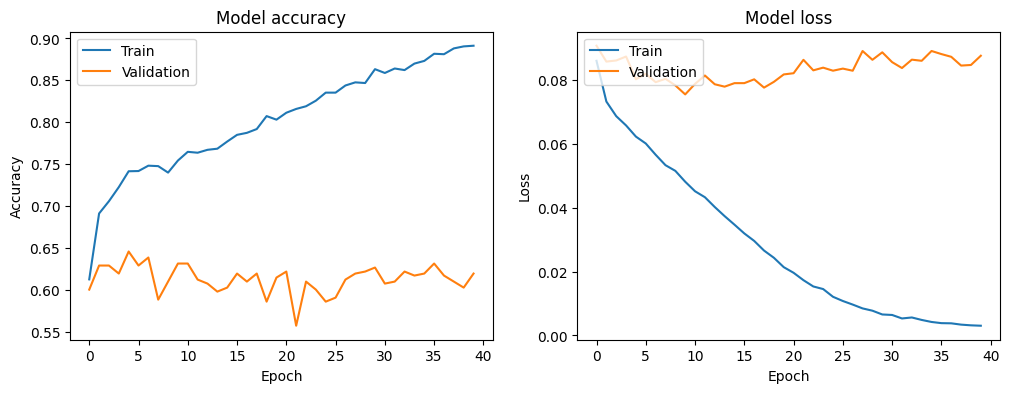

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Generate RGB Colors

In [16]:
from keras.utils import to_categorical
# plot a color image
def plot_rgb(rgb):
    data = [[rgb]]
    plt.figure(figsize=(2,2))
    plt.imshow(data, interpolation='nearest')
    plt.show()

def scale(n):
    return int(n * 255) 

def predict(name):
    name = name.lower()
    tokenized = t.texts_to_sequences([name])
    padded = preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)
    one_hot = to_categorical(padded, num_classes=48)
    pred = model.predict(np.array(one_hot))[0]
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(name + ',', 'R,G,B:', r,g,b)
    plot_rgb(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
tensorflow orange, R,G,B: 249 84 56


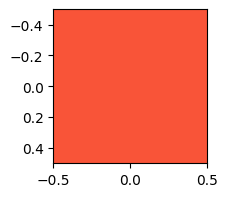

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
forest, R,G,B: 37 193 150


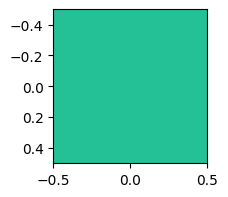

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
keras red, R,G,B: 223 27 24


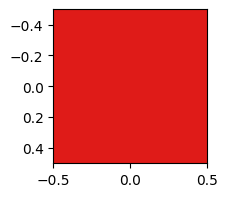

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
cream bull, R,G,B: 202 123 167


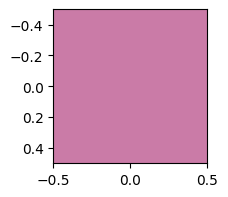

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
evil google, R,G,B: 219 145 45


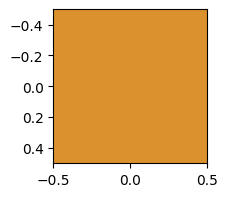

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
fantastic purple, R,G,B: 149 34 143


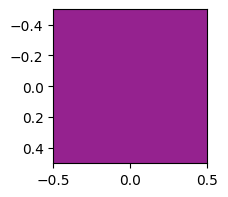

In [247]:
predict("tensorflow orange")
predict("forest")
predict("keras red")
predict("cream bull")
predict("evil google")
predict("fantastic purple")